## Exercise 1.4

Write code that computes the convolution and cross-correlation of signals and plots the results. Use signals from *Example 2.4* and signal pairs $\{s_1, s_2\}$ and $\{s_1, s_3\}$ as the input into your program. Explain the results. Compare your results with the results of sciPy functions **convolve()** and **correlate()**.

In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def convolve(a, b):
    ''' user-defined convolution '''
    N = len(a)
    M = len(b)
    res = np.zeros(N + M - 1)
    
    # solution 1: check conditions each time
    
    for n in range(N + M - 1):    
        for k in range(M):
            if n >= k and n - k < N:
                res[n] += a[n - k] * b[k]
    return res

    # see correlate() function for solution 2

In [3]:
def correlate(a, b):
    ''' user-defined cross-correlation '''
    N = len(a)
    M = len(b)
    res = np.zeros(N + M - 1)

    # solution 2: reserve new array with zeros 
    # at the beginning and at the end
    
    x = np.concatenate((np.zeros(M - 1), a, np.zeros(M - 1)))
    
    for n in range(N + M - 1):
        for k in range(M):
            res[n] += x[M - 1 + n - k] * b[M - 1 - k]
    return res


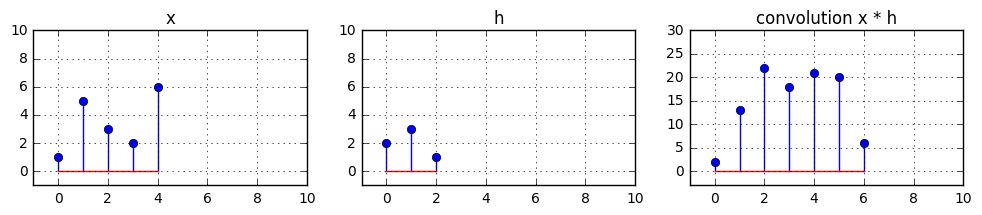

In [73]:
x = np.array([1, 5, 3, 2, 6])
h = np.array([2, 3, 1])

conv1 = sig.convolve(x, h)
conv2 = convolve(x, h)

plt.subplots(1, 3, figsize=(12, 2))
plt.subplot(131, title='x')
plt.stem(x)
plt.xlim([-1, 10])
plt.ylim([-1, 10])
plt.grid()
plt.subplot(132, title='h')
plt.stem(h)
plt.xlim([-1, 10])
plt.ylim([-1, 10])
plt.grid()
plt.subplot(133, title='convolution x * h')
plt.stem(conv1)
plt.xlim([-1, 10])
plt.ylim([-3, 30])
plt.grid()

In [6]:
conv1

array([ 2, 13, 22, 18, 21, 20,  6])

In [8]:
conv2

array([  2.,  13.,  22.,  18.,  21.,  20.,   6.])

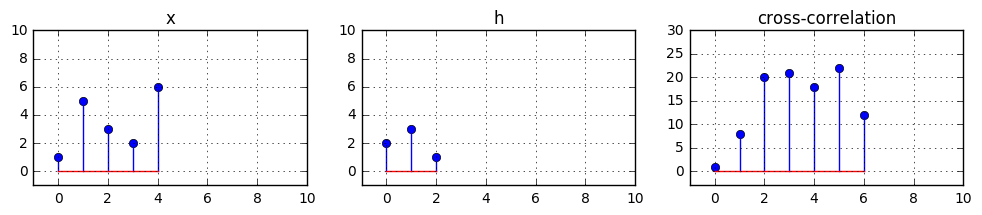

In [77]:
xcorr1 = sig.correlate(x, h)
xcorr2 = correlate(x, h)

plt.subplots(1, 3, figsize=(12, 2))
plt.subplot(131, title='x')
plt.stem(x)
plt.xlim([-1, 10])
plt.ylim([-1, 10])
plt.grid()
plt.subplot(132, title='h')
plt.stem(h)
plt.xlim([-1, 10])
plt.ylim([-1, 10])
plt.grid()
plt.subplot(133, title='cross-correlation')
plt.stem(xcorr1)
plt.xlim([-1, 10])
plt.ylim([-3, 30])
plt.grid()

In [54]:
xcorr1

array([ 1,  8, 20, 21, 18, 22, 12])

In [55]:
xcorr2

array([  1.,   8.,  20.,  21.,  18.,  22.,  12.])


More visual and explanatory example:

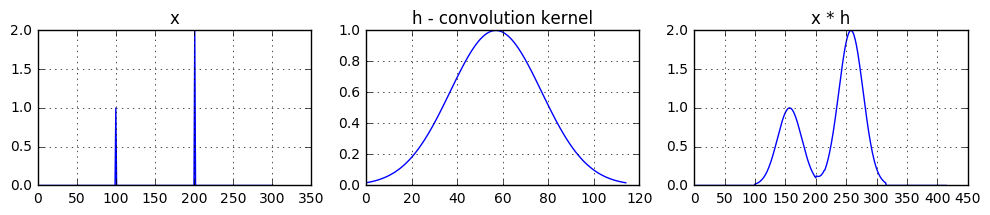

In [56]:
x = np.concatenate([np.zeros(100), [1], np.zeros(100), [2], np.zeros(100)])
h = sig.gaussian(115, std=20)

plt.subplots(1, 3, figsize=(12, 2))
plt.subplot(131, title='x')
plt.plot(x)
plt.grid()
plt.subplot(132, title='h - convolution kernel')
plt.plot(h)
plt.grid()
plt.subplot(133, title='x * h')
plt.plot(convolve(x, h))
plt.grid()